In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sbs
import matplotlib.ticker as mtick

In [2]:
# Script parameters
input_csv = "../results/parsec-phoenix.csv"
baseline = "x86_64,qemu,qemu"

In [3]:
# Parsing baseline argument
base_arch, base_runtime, base_tag = baseline.split(',')

In [4]:
# Read input file
df = pd.read_csv(input_csv, sep=';')
df

,arch,bench,cmdline,dataset,retval,threads,unit,value,runtime,tag
0,aarch64,parsec.blackscholes,build/parsec-bins/pkgs/apps/blackscholes/inst/...,simsmall,0.0,112.0,seconds,0.028224,native,native
1,aarch64,parsec.blackscholes,build/parsec-bins/pkgs/apps/blackscholes/inst/...,simsmall,0.0,112.0,seconds,0.026218,native,native
2,aarch64,parsec.blackscholes,build/parsec-bins/pkgs/apps/blackscholes/inst/...,simsmall,0.0,112.0,seconds,0.026043,native,native
3,x86_64,parsec.blackscholes,build/parsec-bins/pkgs/apps/blackscholes/inst/...,simsmall,0.0,112.0,seconds,0.396270,qemu,qemu
4,x86_64,parsec.blackscholes,build/parsec-bins/pkgs/apps/blackscholes/inst/...,simsmall,0.0,112.0,seconds,0.398585,qemu,qemu
...,...,...,...,...,...,...,...,...,...,...
364,x86_64,phoenix.wordcount,build/phoenix-x86/phoenix-2.0/tests/word_count...,small,0.0,112.0,seconds,1.841331,qemu,tcg-tso
365,x86_64,phoenix.wordcount,build/phoenix-x86/phoenix-2.0/tests/word_count...,small,0.0,112.0,seconds,1.849413,qemu,tcg-tso
366,x86_64,phoenix.wordcount,build/phoenix-x86/phoenix-2.0/tests/word_count...,small,0.0,112.0,seconds,1.891126,qemu,risotto
367,x86_64,phoenix.wordcount,build/phoenix-x86/phoenix-2.0/tests/word_count...,small,0.0,112.0,seconds,1.862428,qemu,risotto


In [5]:
# Extract baseline from dataframe
base_df = df.loc[(df['arch'] == base_arch) & (df['runtime'] == base_runtime) & (df['tag'] == base_tag)]
base_df

,arch,bench,cmdline,dataset,retval,threads,unit,value,runtime,tag
3,x86_64,parsec.blackscholes,build/parsec-bins/pkgs/apps/blackscholes/inst/...,simsmall,0.0,112.0,seconds,0.396270,qemu,qemu
4,x86_64,parsec.blackscholes,build/parsec-bins/pkgs/apps/blackscholes/inst/...,simsmall,0.0,112.0,seconds,0.398585,qemu,qemu
5,x86_64,parsec.blackscholes,build/parsec-bins/pkgs/apps/blackscholes/inst/...,simsmall,0.0,112.0,seconds,0.392206,qemu,qemu
18,x86_64,parsec.bodytrack,build/parsec-bins/pkgs/apps/bodytrack/inst/amd...,simsmall,0.0,112.0,seconds,2.173601,qemu,qemu
19,x86_64,parsec.bodytrack,build/parsec-bins/pkgs/apps/bodytrack/inst/amd...,simsmall,0.0,112.0,seconds,2.180424,qemu,qemu
...,...,...,...,...,...,...,...,...,...,...
343,x86_64,phoenix.stringmatch,build/phoenix-x86/phoenix-2.0/tests/string_mat...,small,0.0,112.0,seconds,1.448540,qemu,qemu
344,x86_64,phoenix.stringmatch,build/phoenix-x86/phoenix-2.0/tests/string_mat...,small,0.0,112.0,seconds,1.436951,qemu,qemu
357,x86_64,phoenix.wordcount,build/phoenix-x86/phoenix-2.0/tests/word_count...,small,0.0,112.0,seconds,1.917006,qemu,qemu
358,x86_64,phoenix.wordcount,build/phoenix-x86/phoenix-2.0/tests/word_count...,small,0.0,112.0,seconds,1.911203,qemu,qemu


In [6]:
# Get the mean for each baseline benchmark
base_means = {}
for b in set(base_df['bench']):
    base_means[b] = np.array(base_df.loc[base_df['bench'] == b]['value'].values, dtype=np.float32).mean()

In [7]:
# Print the mean of every benchmark for each runtime
mean_df = pd.DataFrame()
for b in sorted(set(df['bench'])):
    df_b = df.loc[df['bench'] == b]
    tmp_dict = { 'bench': b }
    for t in set(df_b['tag']):
        df_b_t = df_b.loc[df_b['tag'] == t]
        tmp_dict[t] = np.mean(df_b_t['value'])
    mean_df = mean_df.append(tmp_dict, ignore_index=True)
mean_df

/tmp/ipykernel_17552/2931865525.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_df = mean_df.append(tmp_dict, ignore_index=True)
/tmp/ipykernel_17552/2931865525.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_df = mean_df.append(tmp_dict, ignore_index=True)
/tmp/ipykernel_17552/2931865525.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_df = mean_df.append(tmp_dict, ignore_index=True)
/tmp/ipykernel_17552/2931865525.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_df = mean_df.append(tmp_dict, ignore_index=True)
/tmp/ipykernel_17552/2931865525.py:9: FutureWarning: The frame.append method is deprecated a

,bench,native,risotto,qemu,no-fences,tcg-tso
0,parsec.blackscholes,0.027001,0.385386,0.395612,0.300819,0.382164
1,parsec.bodytrack,0.091896,2.061751,2.185066,1.449267,2.043373
2,parsec.canneal,0.786766,5.389552,5.390142,5.101080,5.381426
3,parsec.fluidanimate,0.457577,3.288130,3.510537,2.036981,3.278078
4,parsec.freqmine,0.453915,3.272544,3.651489,2.106782,3.304243
5,parsec.streamcluster,5.036018,11.791547,15.505530,6.580337,12.871329
6,parsec.swaptions,0.034273,0.911227,0.999623,0.516676,0.904819
7,parsec.vips,0.292659,2.208313,2.265378,1.776038,2.239120
8,phoenix.histogram,0.159786,1.002494,1.040354,0.721707,0.987371
9,phoenix.kmeans,1.390282,10.494240,10.768619,5.282296,10.519085


In [8]:
# Normalize all results from original df to these means
df_norm = pd.DataFrame(columns=['arch', 'bench', 'dataset', 'threads', 'unit', 'value', 'runtime',
                                'tag', 'norm', 'label'])
norm_vals = []
for row in df.itertuples():
    try:
        if row.arch == base_arch and row.runtime == base_runtime and row.tag == base_tag:
            continue
        # norm = base_means[row.bench] / float(row.value)      # speedup
        norm = 100 * float(row.value) / base_means[row.bench]    # relative perf
        
        # norm = 100 * (base_means[row.bench] - float(row.value)) / base_means[row.bench]
        dct = row._asdict()
        dct['norm'] = norm
        dct['label'] = f"{dct['tag']}"
        # dct['label'] = f"{dct['runtime']}-{dct['tag']}"
        del dct['Index']
        del dct['cmdline']
        norm_vals.append(dct)
    except KeyError:
        pass
df_norm = df_norm.append(norm_vals, ignore_index=True)
df_norm

/tmp/ipykernel_17552/1778803598.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_norm = df_norm.append(norm_vals, ignore_index=True)


,arch,bench,dataset,threads,unit,value,runtime,tag,norm,label,retval
0,aarch64,parsec.blackscholes,simsmall,112.0,seconds,0.028224,native,native,7.134327,native,0.0
1,aarch64,parsec.blackscholes,simsmall,112.0,seconds,0.026218,native,native,6.627190,native,0.0
2,aarch64,parsec.blackscholes,simsmall,112.0,seconds,0.026043,native,native,6.583075,native,0.0
3,x86_64,parsec.blackscholes,simsmall,112.0,seconds,0.301437,qemu,no-fences,76.195148,no-fences,0.0
4,x86_64,parsec.blackscholes,simsmall,112.0,seconds,0.299307,qemu,no-fences,75.656854,no-fences,0.0
...,...,...,...,...,...,...,...,...,...,...,...
289,x86_64,phoenix.wordcount,small,112.0,seconds,1.841331,qemu,tcg-tso,96.254133,tcg-tso,0.0
290,x86_64,phoenix.wordcount,small,112.0,seconds,1.849413,qemu,tcg-tso,96.676622,tcg-tso,0.0
291,x86_64,phoenix.wordcount,small,112.0,seconds,1.891126,qemu,risotto,98.857136,risotto,0.0
292,x86_64,phoenix.wordcount,small,112.0,seconds,1.862428,qemu,risotto,97.356972,risotto,0.0


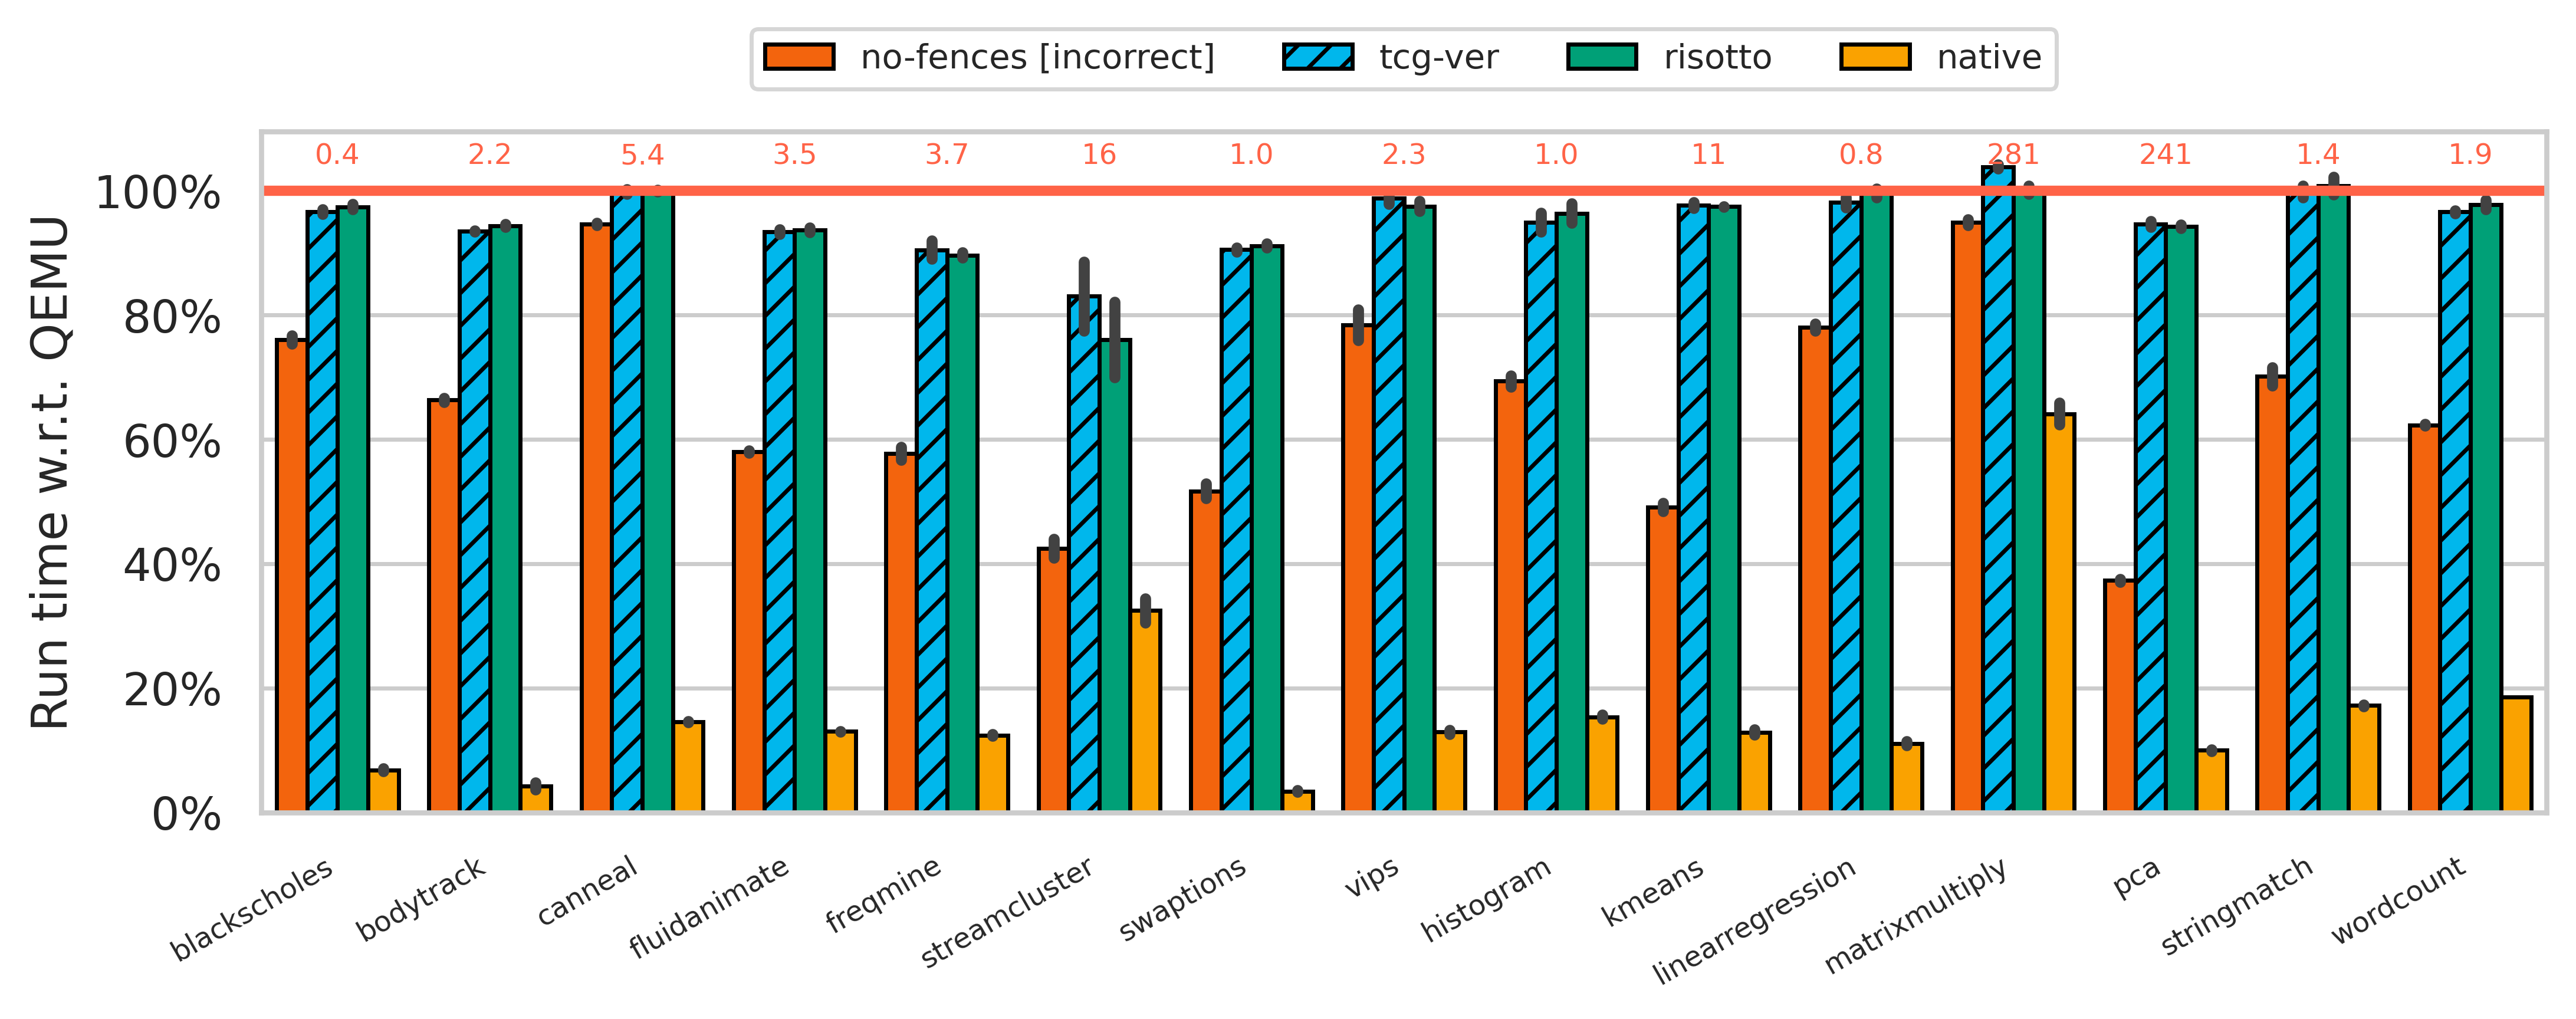

In [9]:
# refactor xticks to remove benchmark suite prefix
xlabels = []
xticks = []
for idx, b in enumerate(sorted(set(df_norm['bench']))):
    if b.startswith("parsec."):
        xlabels.append(b[7:])
        xticks.append(idx)
    else:
        xlabels.append(b[8:])
        xticks.append(idx)

# Plot
fig = plt.figure(figsize=(10, 3), dpi=500)
sbs.set(style="whitegrid")
palette = {
    'orange': '#faa200',
    'sky blue': '#00b7ec',
    'bluish green': '#00a077',
    'yellow': '#f5e636',
    'blue': '#0077b8',
    'vermillion': '#f3640d',
    'reddish purple': '#e47ead'
}
ax = sbs.barplot(data=df_norm, ci='sd',
                 x='bench', y='norm',
                 hue='label',# palette=palette,
                 order=sorted(set(df_norm['bench'])), hue_order=['no-fences', 'tcg-tso', 'risotto', 'native'])
plt.grid(visible=True, axis='y')
plt.xticks(ticks=xticks, labels=xlabels, rotation=30, ha="right", fontsize='xx-small')
ax.set_axisbelow(True)
plt.xlabel("")
max_val = max(df_norm['norm'].values)
plt.ylim(0, max_val*1.05)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel("Run time w.r.t. QEMU")
plt.axhline(y=100, xmin=0, xmax=1, color='tomato', linewidth=2.5)
# Annotate the raw value of the baseline
for idx, value in enumerate(sorted(set(base_means))):
    tmp = df_norm.loc[df_norm['bench'] == value]['norm'].values.mean()
    v = base_means[value]
    if v < 10:
        v_str = f"{v:.1f}"
    else:
        v_str = f"{v:.0f}"
    plt.text(idx, max(tmp, max_val), v_str, fontsize='xx-small', color='tomato', ha='center')
    
# Set color + hatch
style = {
    'fill': [ True, True, True, True ],
    'color': [ palette['vermillion'], palette['sky blue'], palette['bluish green'], palette['orange'] ],
    'hatch': [ '', '///', '', ''],
    'label': ['no-fences [incorrect]', 'tcg-ver', 'risotto', 'native'],
    'edgecolor': [ 'black', 'black', 'black', 'black' ]
}
for idx, bar in enumerate(ax.patches):
    bar_nr = int(idx / len(base_means))
    bar.set(color=style['color'][bar_nr], fill=style['fill'][bar_nr],
            hatch=style['hatch'][bar_nr], edgecolor=style['edgecolor'][bar_nr])
    
# parsec / phoenix separation
#plt.vlines([ 8.5 ], ymin=0, ymax=1.2, linestyle='solid', colors='black', linewidth=2.5, zorder=10)
#matplotlib.text(.4, .1, "parsec", xycoords='axes points')

handles, labels = ax.get_legend_handles_labels()
plt.legend(labels=style['label'], handles=handles, loc='upper center', bbox_to_anchor=(0.5, 1.15),
           borderaxespad=0, ncol=4, fontsize='x-small')

In [10]:
fig.savefig("fig12.pdf", dpi=500, bbox_inches='tight')

In [11]:
# Compute fence cost
fence_cost = 100 * (1 - mean_df['no-fences'] / mean_df['qemu'])
print(f"Average time spent on fences: {fence_cost.mean():.2f}%")
fence_cost

Average time spent on fences: 34.25%


0     23.961123
1     33.673983
2      5.362800
3     41.975240
4     42.303495
5     57.561352
6     48.312895
7     21.600821
8     30.628717
9     50.947327
10    21.983158
11     5.123308
12    62.703186
13    29.861726
14    37.686461
dtype: float64

In [12]:
# tcg-tso gain
for b in sorted(set(df_norm['bench'])):
    d = df_norm.loc[df_norm['bench'] == b]
    d = d.loc[d['tag'] == 'tcg-tso']
    print(f"{b}: {d['value'].values.mean():.2f}")

parsec.blackscholes: 0.38
parsec.bodytrack: 2.04
parsec.canneal: 5.38
parsec.fluidanimate: 3.28
parsec.freqmine: 3.30
parsec.streamcluster: 12.87
parsec.swaptions: 0.90
parsec.vips: 2.24
phoenix.histogram: 0.99
phoenix.kmeans: 10.52
phoenix.linearregression: 0.82
phoenix.matrixmultiply: 291.45
phoenix.pca: 227.84
phoenix.stringmatch: 1.43
phoenix.wordcount: 1.85


In [13]:
mean_df['tcg-tso-pct'] = 100 * (1 - mean_df['tcg-tso'] / mean_df['qemu'])
mean_df

,bench,native,risotto,qemu,no-fences,tcg-tso,tcg-tso-pct
0,parsec.blackscholes,0.027001,0.385386,0.395612,0.300819,0.382164,3.399283
1,parsec.bodytrack,0.091896,2.061751,2.185066,1.449267,2.043373,6.484598
2,parsec.canneal,0.786766,5.389552,5.390142,5.101080,5.381426,0.161710
3,parsec.fluidanimate,0.457577,3.288130,3.510537,2.036981,3.278078,6.621752
4,parsec.freqmine,0.453915,3.272544,3.651489,2.106782,3.304243,9.509707
5,parsec.streamcluster,5.036018,11.791547,15.505530,6.580337,12.871329,16.988783
6,parsec.swaptions,0.034273,0.911227,0.999623,0.516676,0.904819,9.484036
7,parsec.vips,0.292659,2.208313,2.265378,1.776038,2.239120,1.159131
8,phoenix.histogram,0.159786,1.002494,1.040354,0.721707,0.987371,5.092779
9,phoenix.kmeans,1.390282,10.494240,10.768619,5.282296,10.519085,2.317235


In [14]:
mean_df['tcg-tso-pct'].values.mean()

4.5432329345355384